# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

Our goal in this notebook is to forecast dishes that will reach an 80% popularity rate while reducing the visibility of recipes that aren't that popular.
 First, we'll make sure the data is legitimate by fixing missing values, eliminating duplicates, and changing the data types of dataframe columns. 
 In order to glean insights, we will then go into data investigation.  We'll build an appropriate machine learning model and evaluate its effectiveness while keeping these observations in mind.
 Finally, in order to help the business, we will match our solution with business data and offer suggestions as necessary.

In [81]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [82]:
#read recipe_site_traffic.csv file and convert it into dataframe
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")

#checking first 5 rows of the dataframe
recipe_site_traffic.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [83]:
#finding the number of duplicated recipes
recipe_site_traffic.duplicated(subset='recipe').sum()

0

No rows need to be removed because there are no duplicate recipes.
 We then look at the dataset's dimensions in terms of rows and columns, as well as the names of the columns and the data types that correspond to them.
 The number of non-null values in each column will also be evaluated.
 We will take the necessary steps to remedy any issues with missing values or the need for any data type conversions.

In [84]:
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [85]:
#checking the values of servings column
recipe_site_traffic['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [86]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].str.replace(" as a snack", "")

#checking the values of servings column again
recipe_site_traffic['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [87]:
#converting data type of servings column to integer
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('int')

In [88]:
#checking the values of high_traffic column
recipe_site_traffic['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [89]:
#replacing the rows with value "High" with True, and null values with False
recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == "High", True, False)

#checking the values of high_traffic column again
recipe_site_traffic['high_traffic'].value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

In [90]:
#checking the values of category column
recipe_site_traffic['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [91]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['category'] = recipe_site_traffic['category'].str.replace(" Breast", "")

#checking the values of servings column again
recipe_site_traffic['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [92]:
#converting data type of category column to category
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')

In [93]:
#checking the summary of dataframe's structure
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [94]:
#checking the values of servings column
recipe_site_traffic['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [95]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype(str)
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].str.replace(" as a snack", "")

#checking the values of servings column again
recipe_site_traffic['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

We may modify the data type of the "servings" column to integer as it only includes integer numbers.
 This column is more of a category variable even if it has a numerical component.
 Since it will need to be changed back to integer format during the model construction and assessment stages, we may keep its numeric data type for the time being.

In [96]:
#converting data type of servings column to integer
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('int')

The distribution of values in the "high_traffic" column must be examined because the data type of this column is now classified as object as well.
 Our decision for the best data type conversion for this column will be guided by the results of this assessment.

In [97]:
#checking the values of high_traffic column
recipe_site_traffic['high_traffic'].value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

Given that the "high_traffic" column only has one value, "High," null values in this column are interpreted as representing "Low" traffic.
 As a result, we can change this column's data type to boolean.
 Here, "High" traffic is denoted by True, and "Low" traffic by False.
 The "category" column is the last one that needs attention.  We must determine whether any rows that are currently categorized as object type need to be modified in order to make the conversion to category type easier.
 To obtain a better understanding, we first examine the distribution of values in this column.

In [98]:
#checking the values of category column
recipe_site_traffic['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

"Chicken Breast," an additional category, seems to be in the "category" column.  But since the specified requirements need the presence of particular categories such as "Lunch/Snacks," "Beverages," "Potato," "Vegetable," "Meat," "Chicken," "Pork," "Dessert," "Breakfast," and "One Dish Meal," it is clear that "Chicken Breast" does not fit the bill. 
 So, it seems sense to put this topic under the 'Chicken' category.  Let's go ahead and adjust this appropriately.

In [99]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['category'] = recipe_site_traffic['category'].str.replace(" Breast", "")

#checking the values of servings column again
recipe_site_traffic['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [100]:
#converting data type of category column to category
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')

In [101]:
#checking the summary of dataframe's structure
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [102]:
#checking missing numbers for each columns
recipe_site_traffic.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [103]:
#showing all rows with missing values
recipe_site_traffic[recipe_site_traffic.isnull().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
48,49,NaN,NaN,NaN,NaN,Chicken,4,False
82,83,NaN,NaN,NaN,NaN,Meat,4,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
116,117,NaN,NaN,NaN,NaN,Chicken,6,True
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True


In [104]:
#dropping missing values
recipe_site_traffic = recipe_site_traffic.dropna().reset_index(drop=True)

In [105]:
#checking missing numbers for each columns
recipe_site_traffic.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [106]:
#checking the summary of dataframe's structure
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 44.2 KB


The dataframe is now ready for exploratory analysis when the data validation and cleaning processes are finished.
 We can now calculate descriptive statistics for every dataframe's numerical column. 
 This procedure will yield important information about the properties of the data.

In [107]:
#generating descriptive statistic for each columns
recipe_site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


It is clear from examining the descriptive statistics that there is a significant standard variation, especially in the columns pertaining to calories and nutritional components.  Furthermore, outliers are shown by the quantile values, which add to the distribution's skewness.   The value distribution is therefore non-normal, highlighting the fact that the median is a more representative metric for these columns.

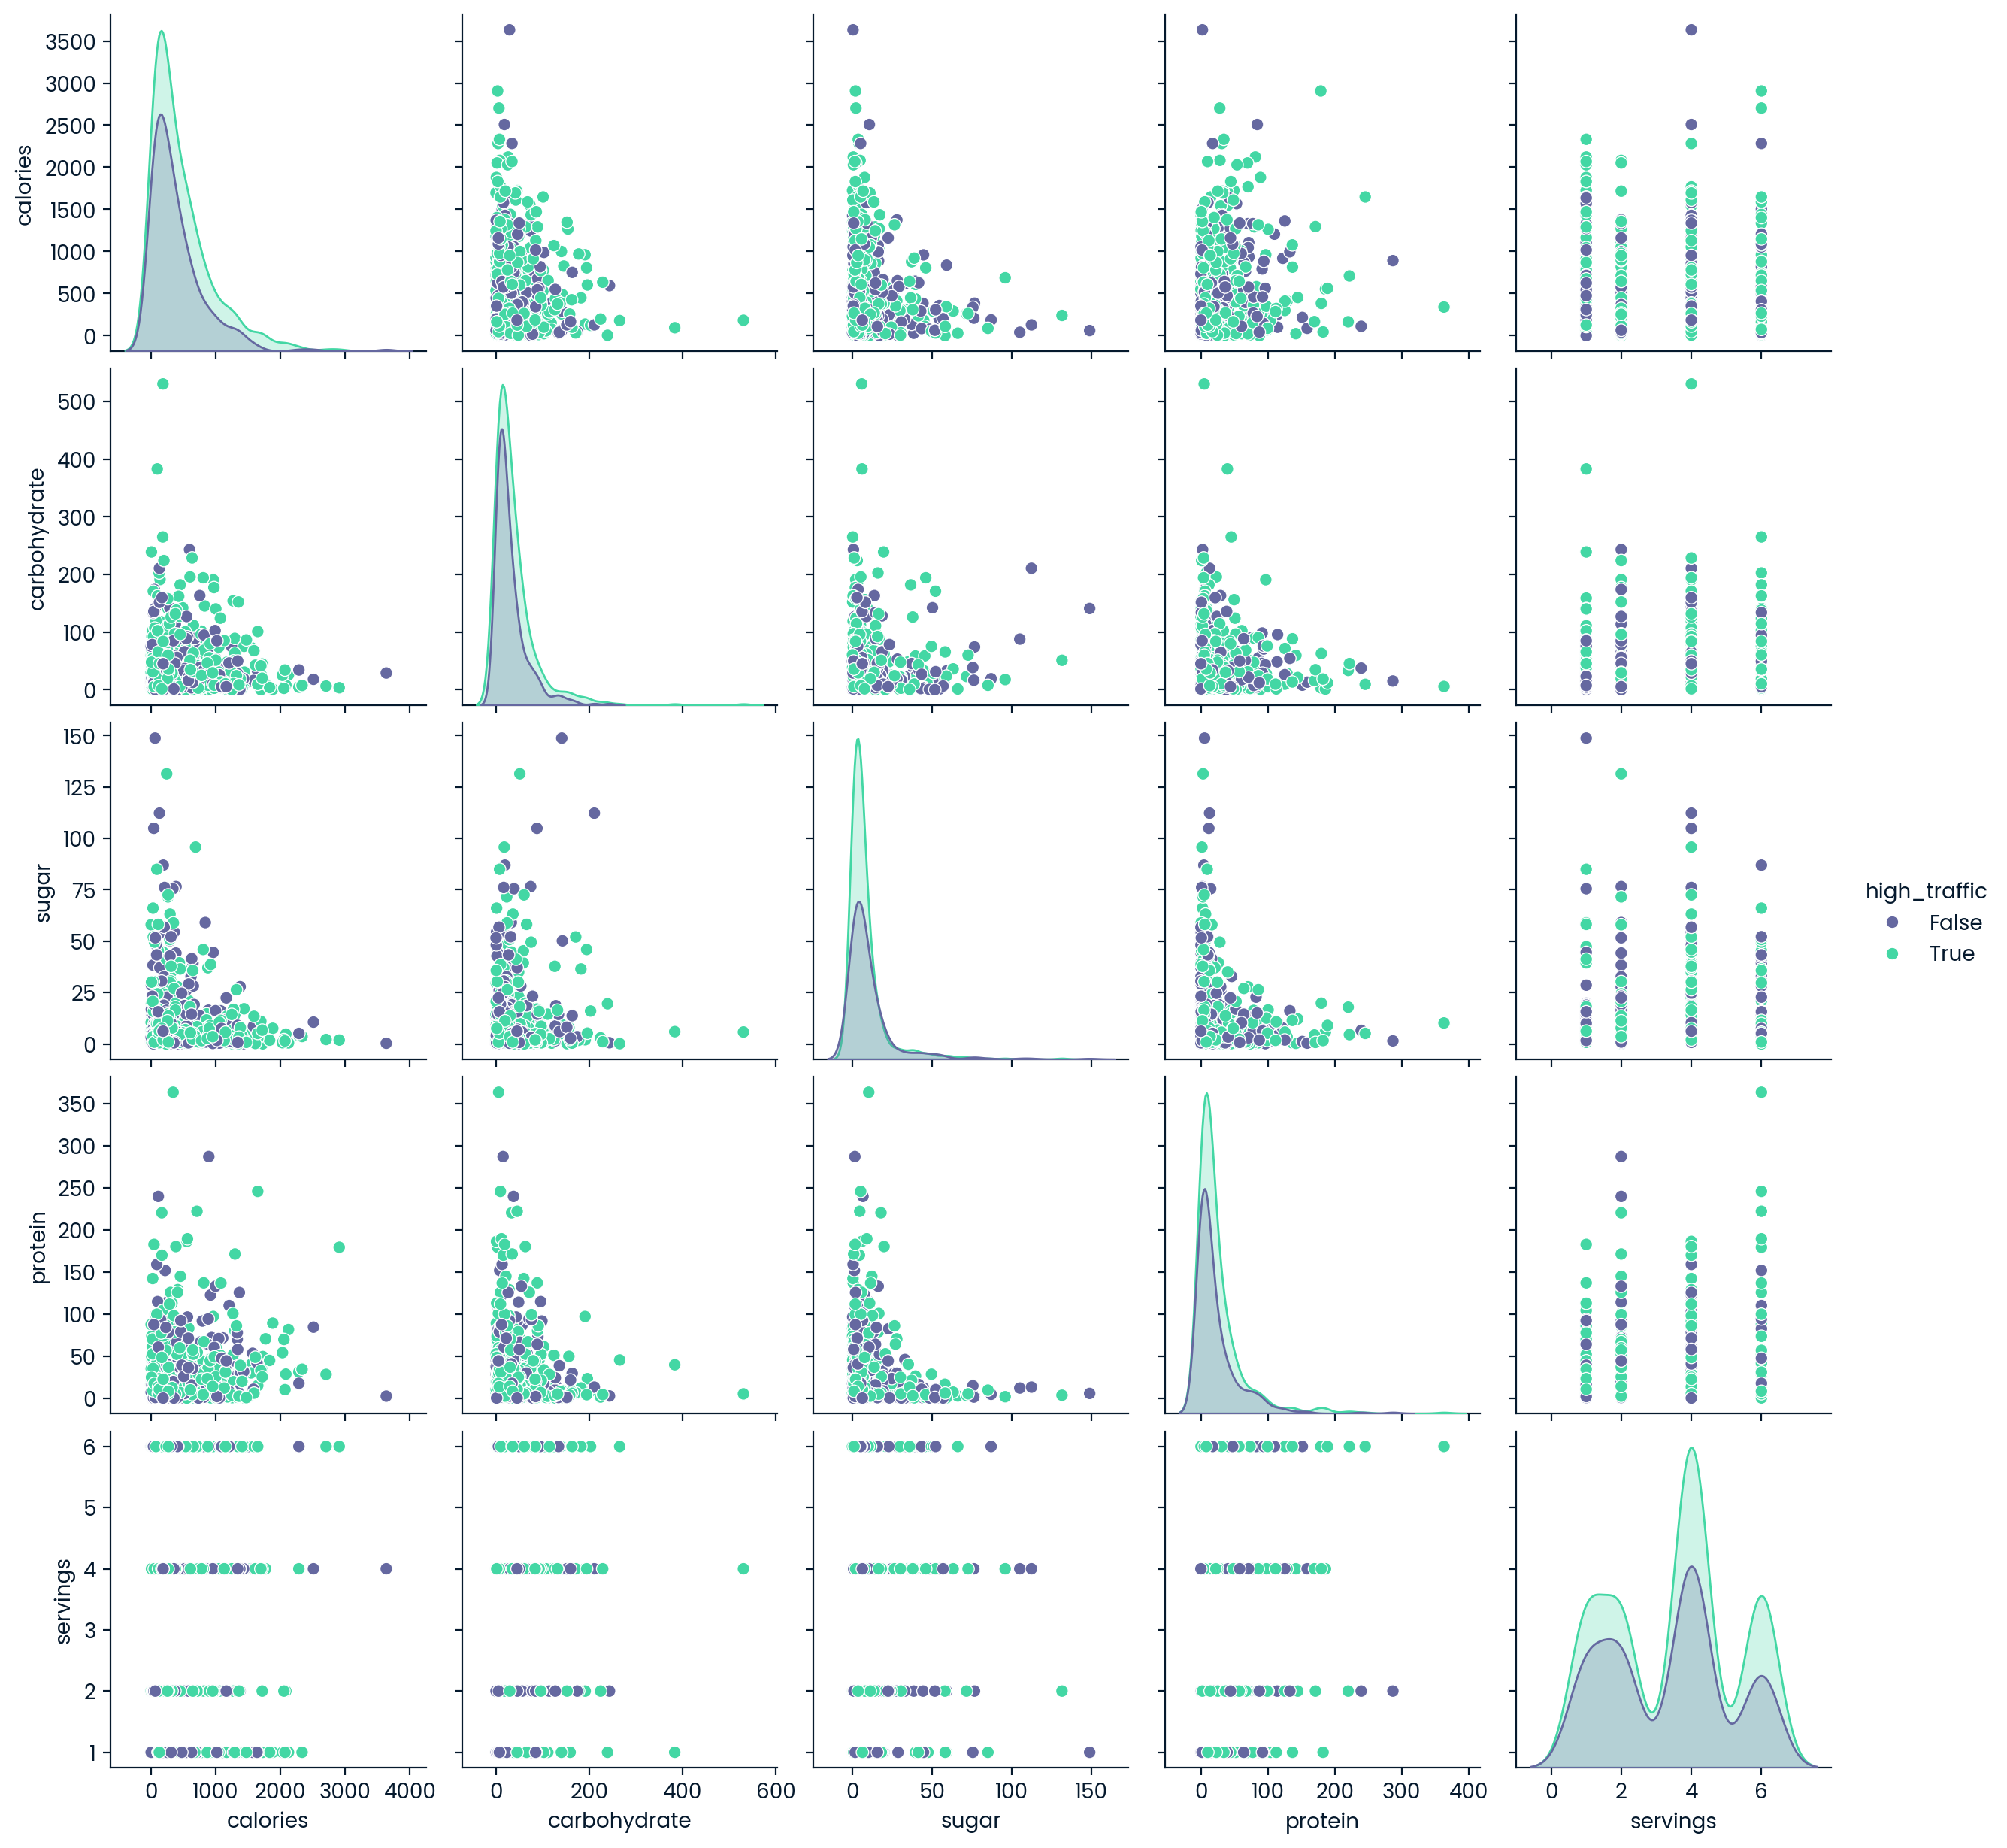

In [108]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(recipe_site_traffic[filtered_columns], hue='high_traffic')
plt.show()

It is clear from the figure that these columns do not significantly correlate with one another.

To see how the calories are distributed throughout the recipes, we will then create a histogram.

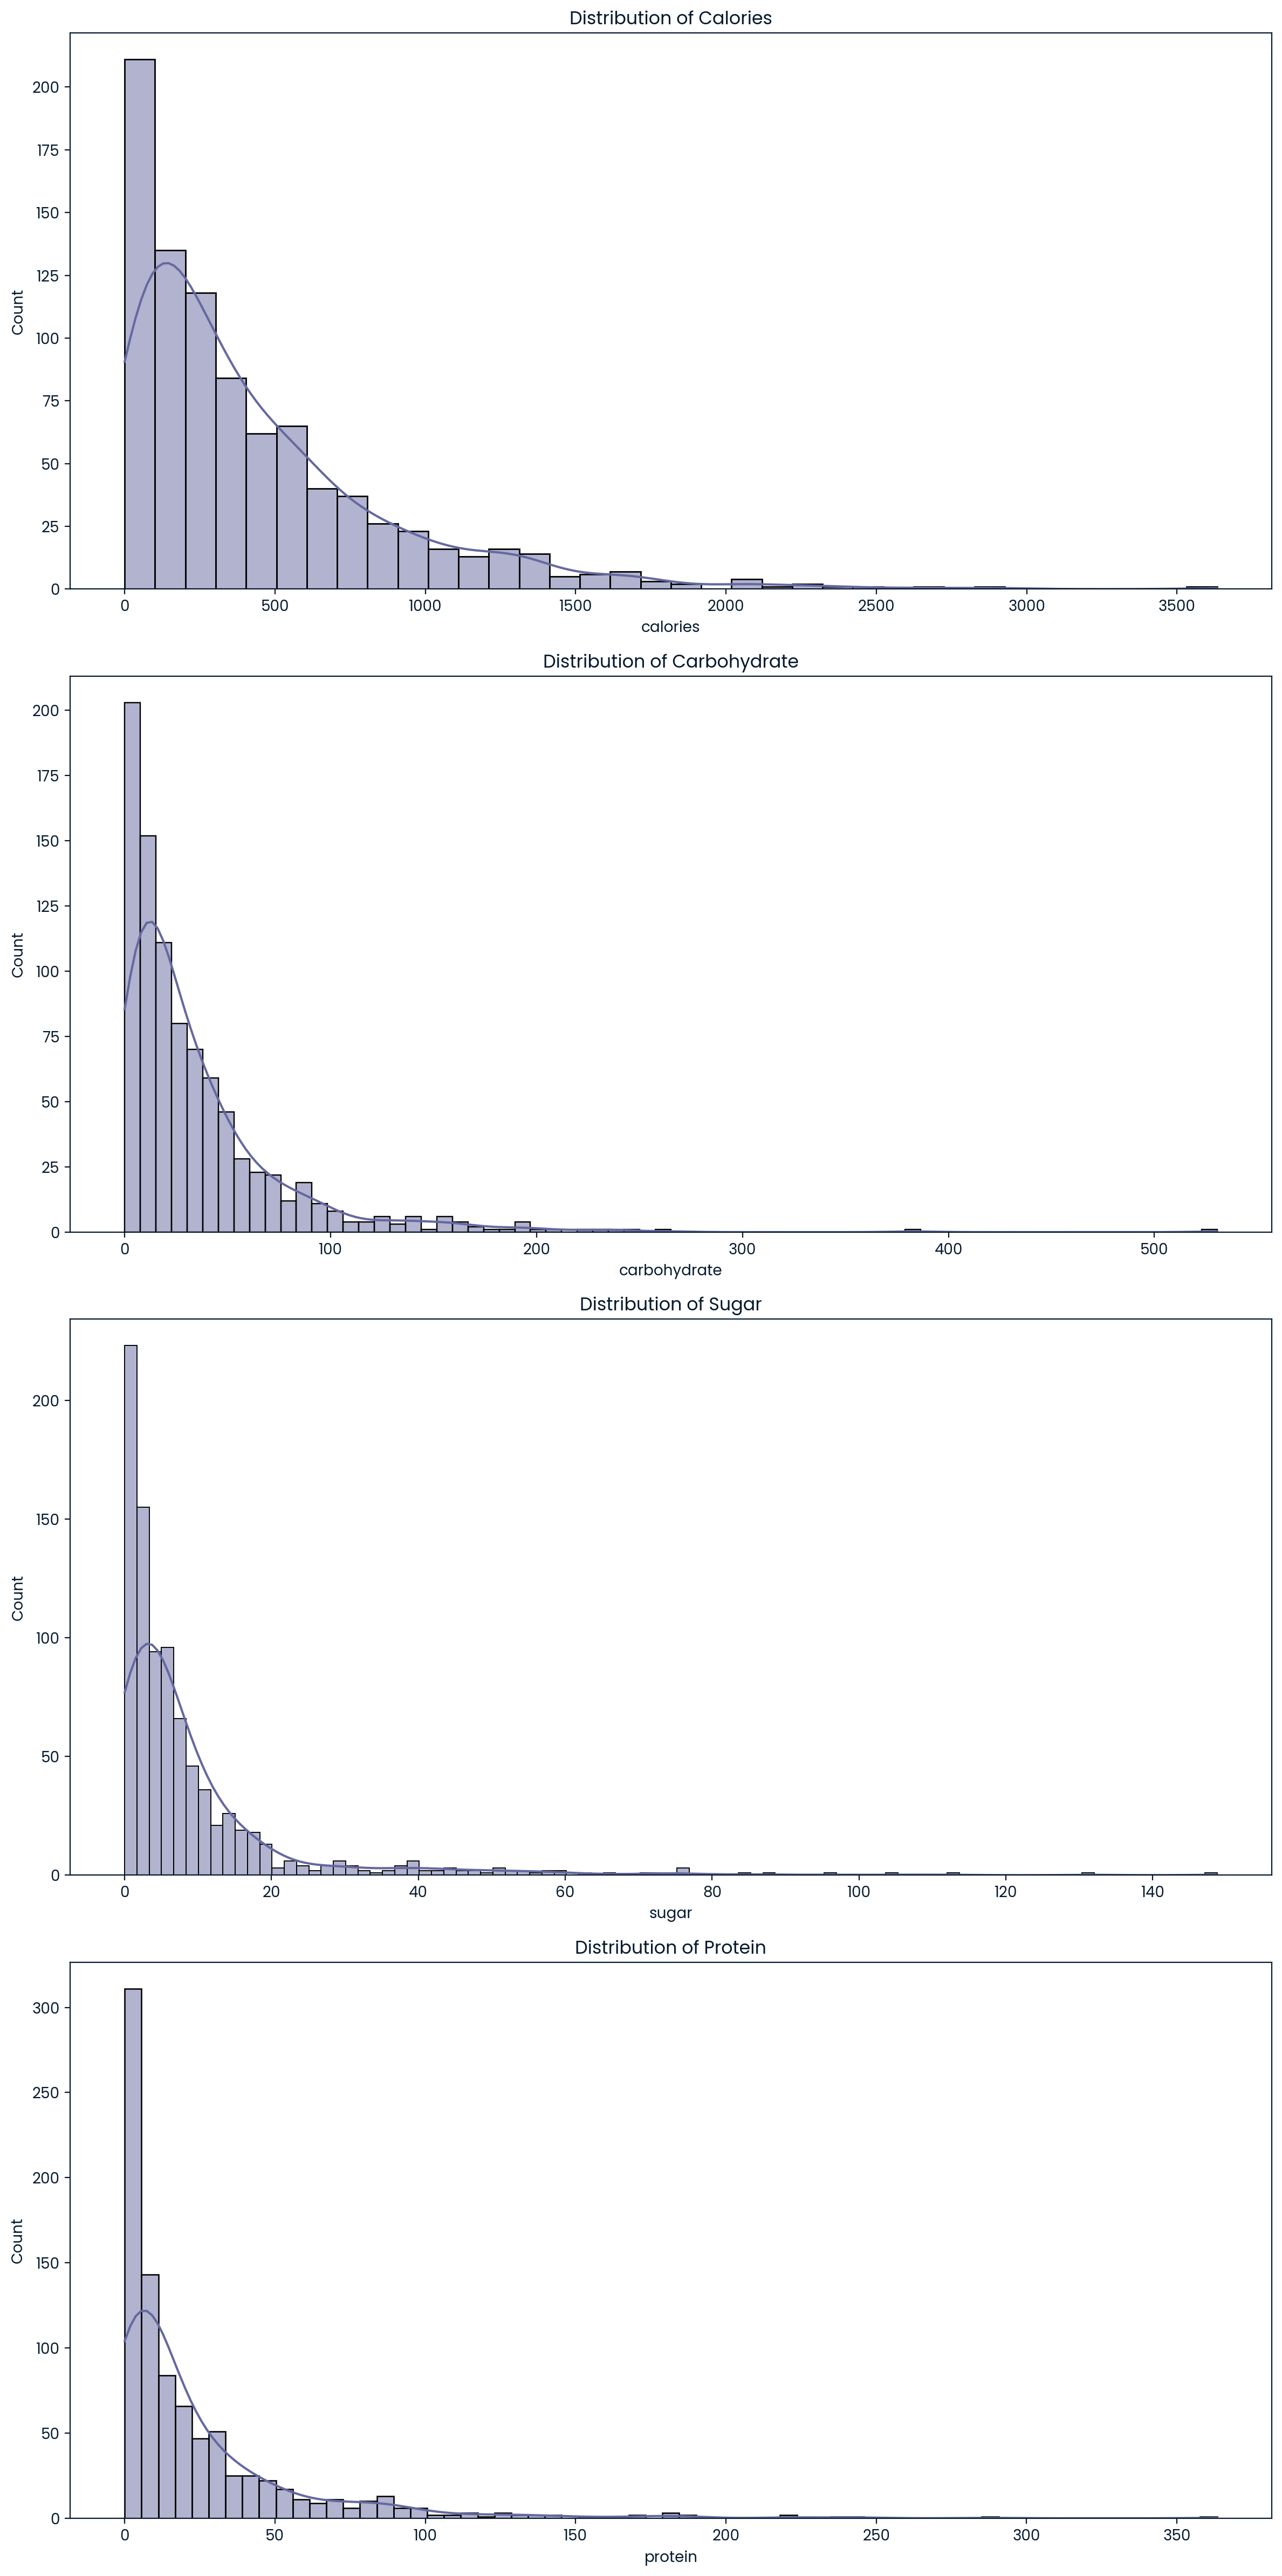

In [109]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=recipe_site_traffic, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

When Kernel Density Estimation (KDE) is used in the displays, the underlying data distribution is depicted as a smooth curve.

 It is clear from observation that the dataset is primarily composed of lower values for the nutritional and calorie content of foods or beverages.  The histograms support our previous claim about skewness.  In fact, a right-skewed distribution can be seen in all of the numerical columns.

 Let's go on to presenting the distribution using box plots to further demonstrate it.

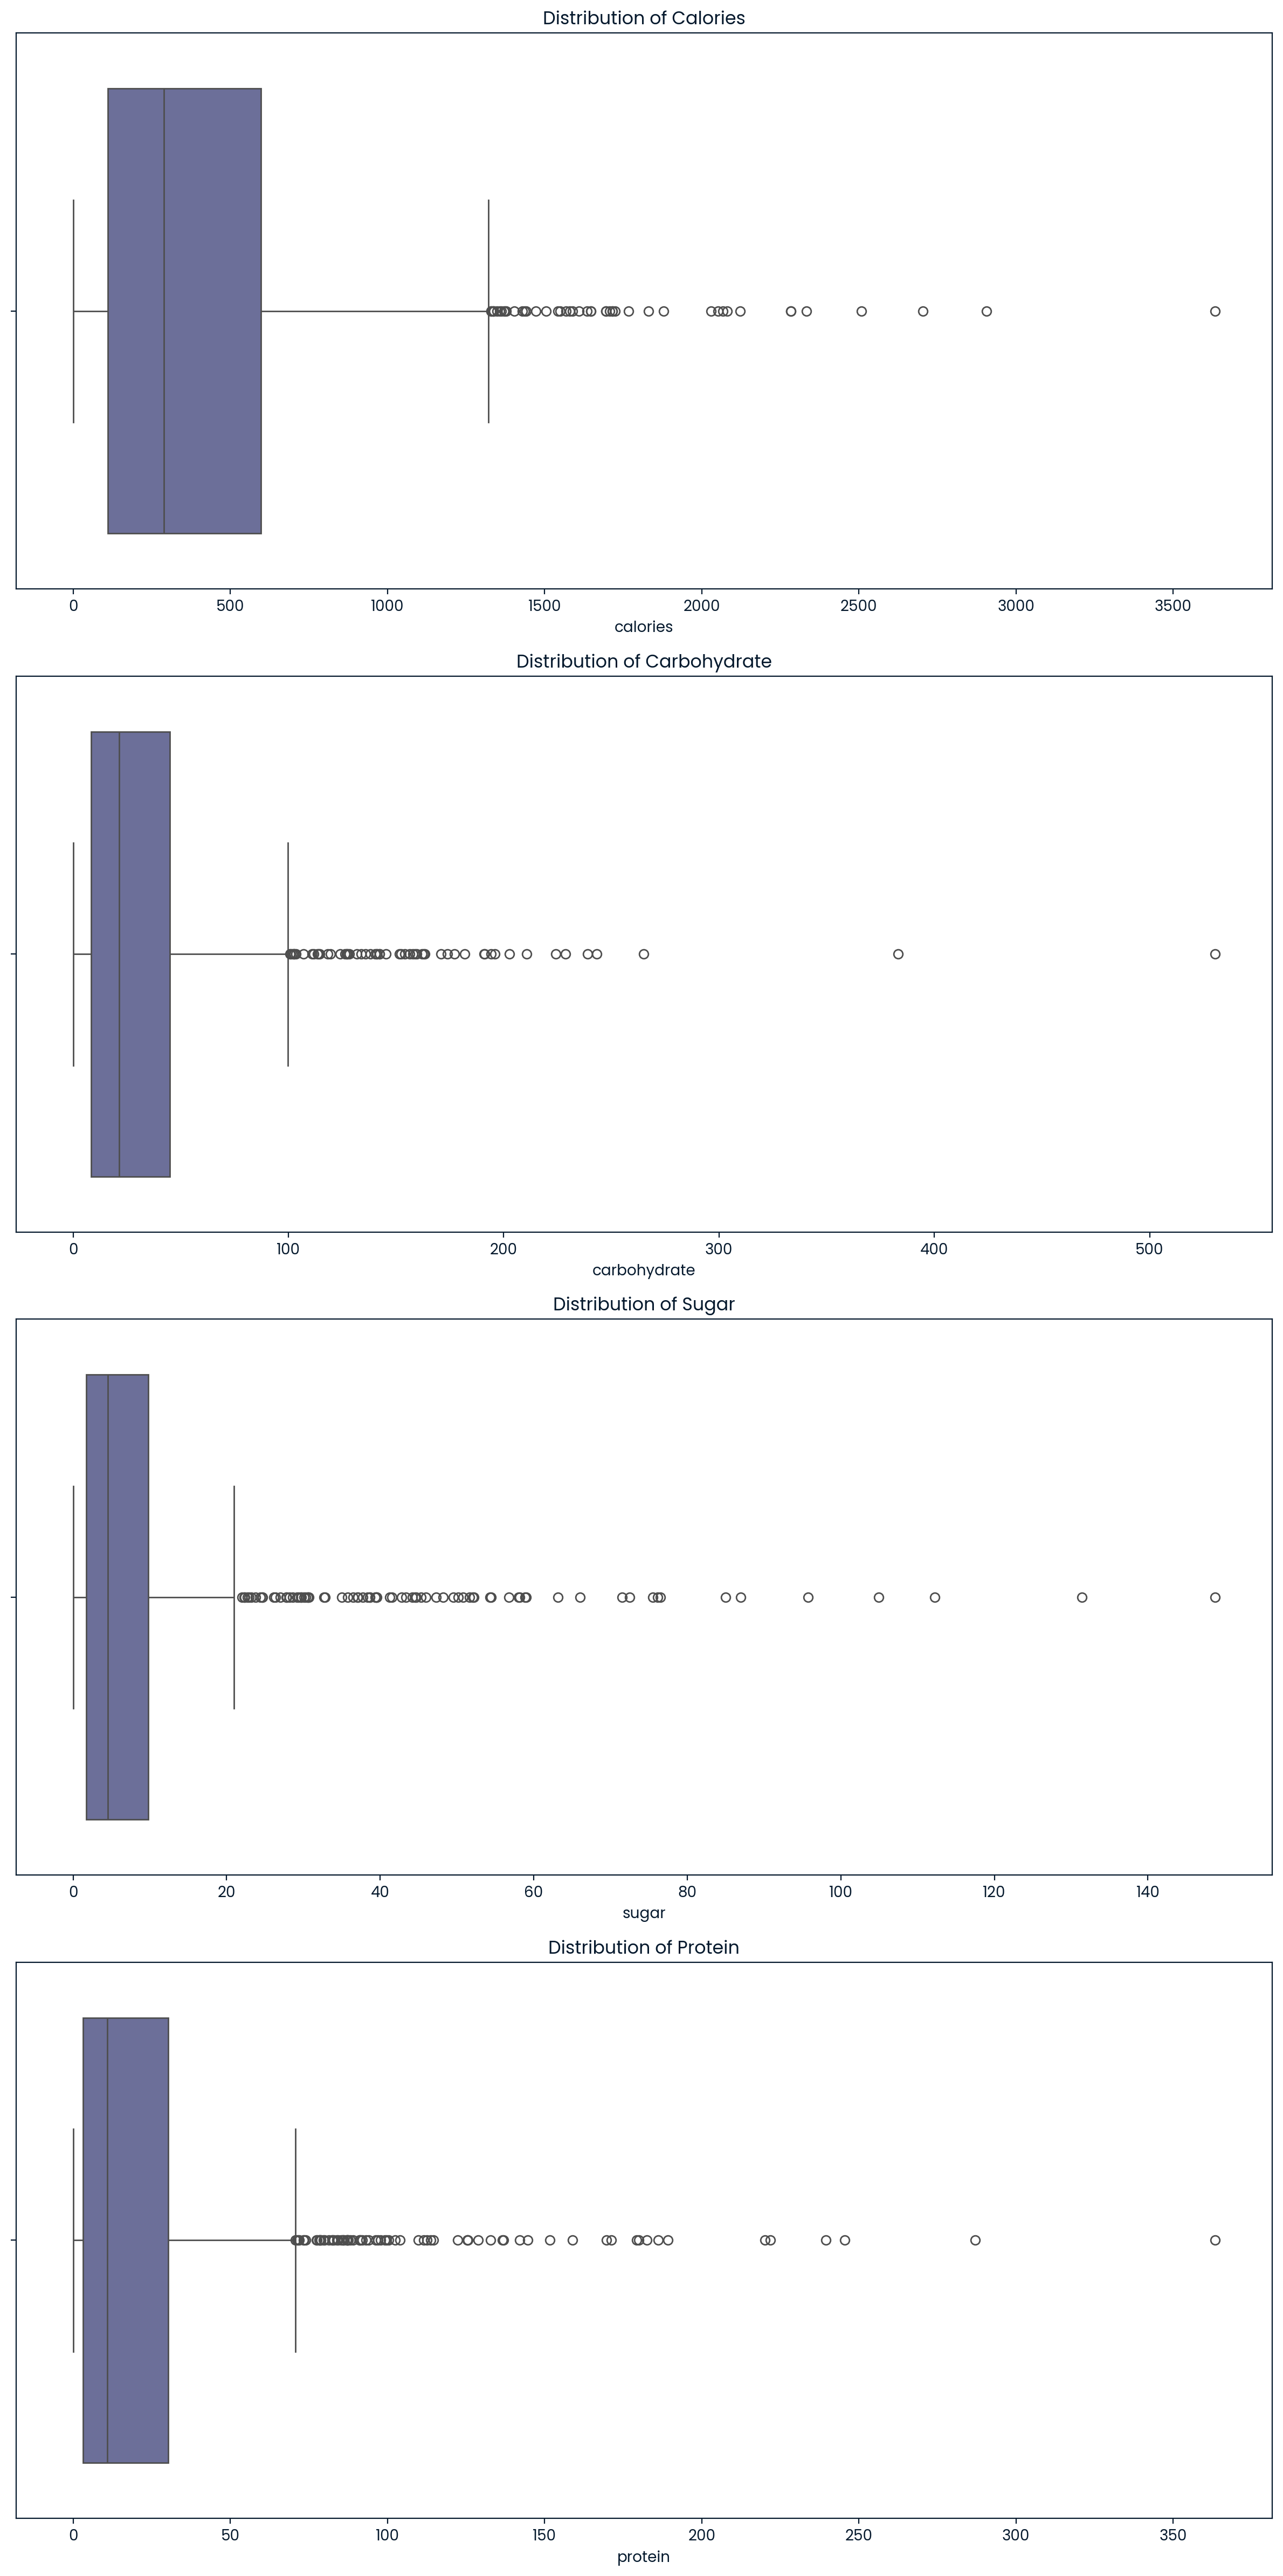

In [110]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=recipe_site_traffic, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Again, the plots above confirm that there are outliers, that these columns are skewed to the right, and that using the median for analysis is crucial.

 Additionally, we can examine the category-specific median values for calories and nutritional components.  This can be accomplished by classifying the data and then computing the median aggregate.

        category  calories  carbohydrate   sugar  protein
0      Beverages   126.455        11.250   8.075    0.410
1      Breakfast   229.380        28.420   4.830   11.685
2        Chicken   379.160        15.490   3.500   33.170
3        Dessert   288.550        38.550  24.650    4.810
4   Lunch/Snacks   369.505        31.985   2.750   12.965
5           Meat   460.870        19.115   3.385   28.530
6  One Dish Meal   419.280        25.430   4.040   28.480
7           Pork   399.260        19.560   5.230   29.820
8         Potato   269.460        32.540   2.640    5.900
9      Vegetable   124.305        13.335   3.700    4.835


<Figure size 640x480 with 0 Axes>

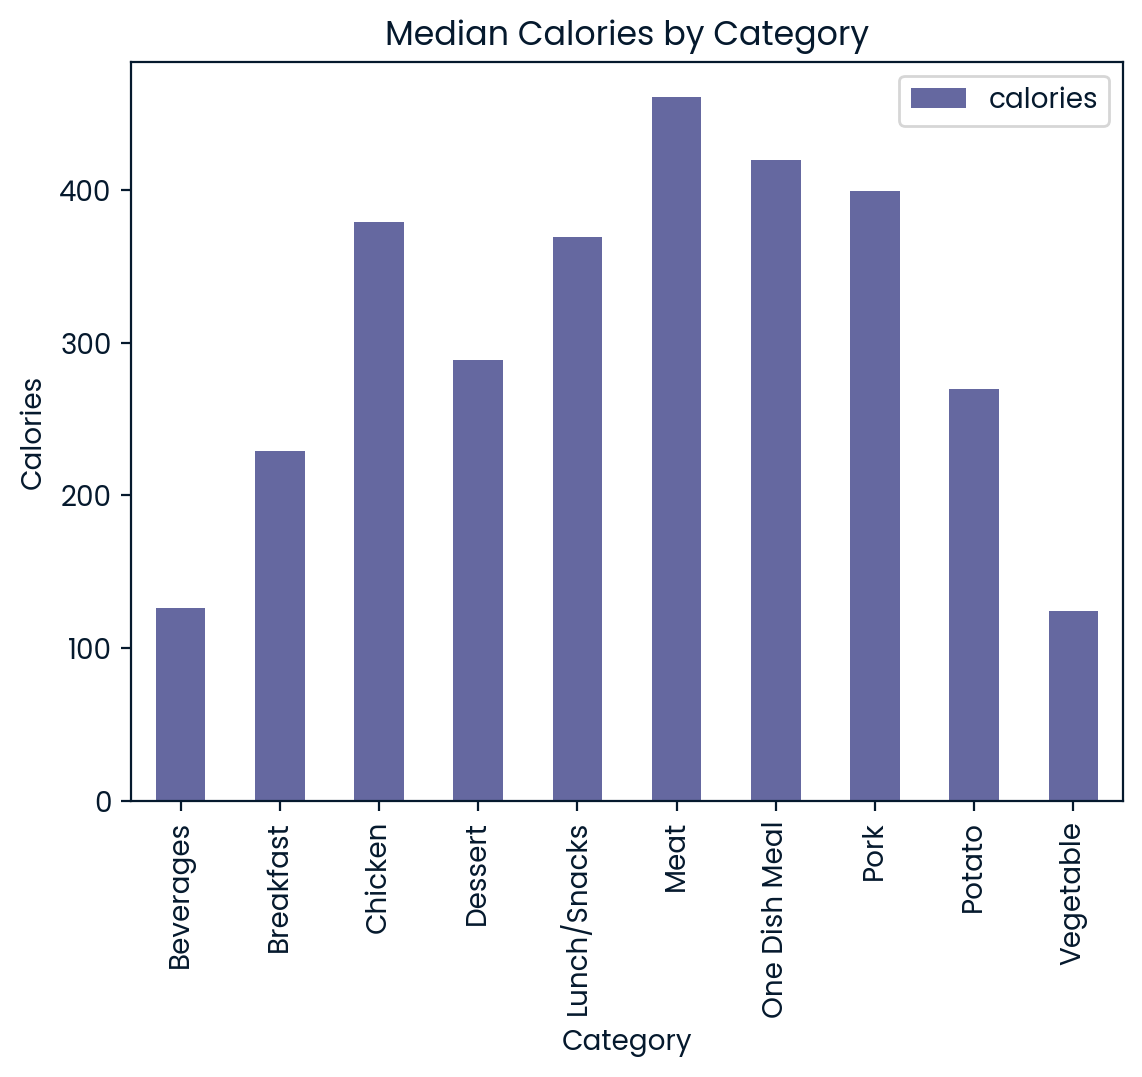

<Figure size 640x480 with 0 Axes>

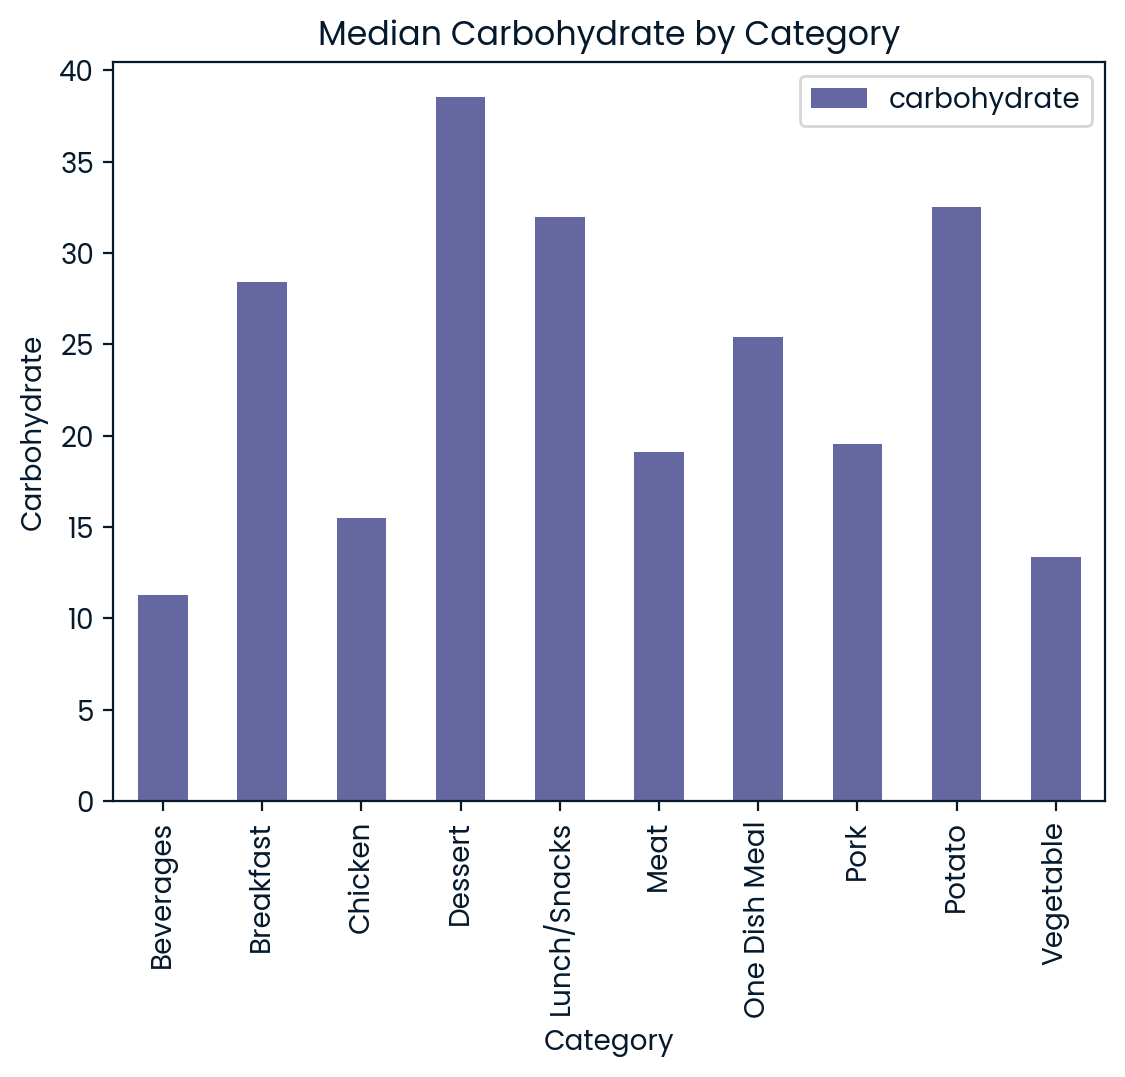

<Figure size 640x480 with 0 Axes>

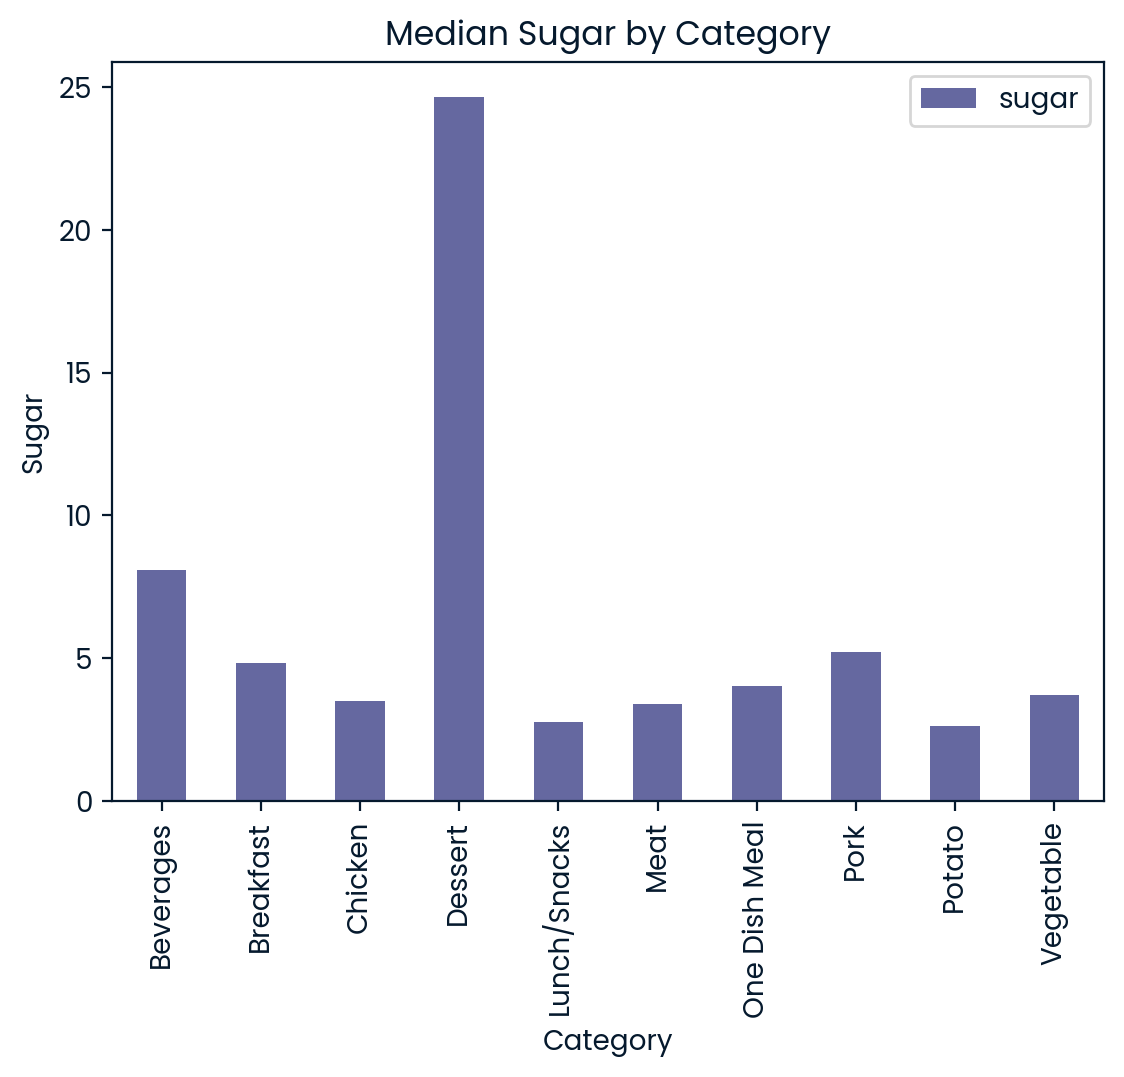

<Figure size 640x480 with 0 Axes>

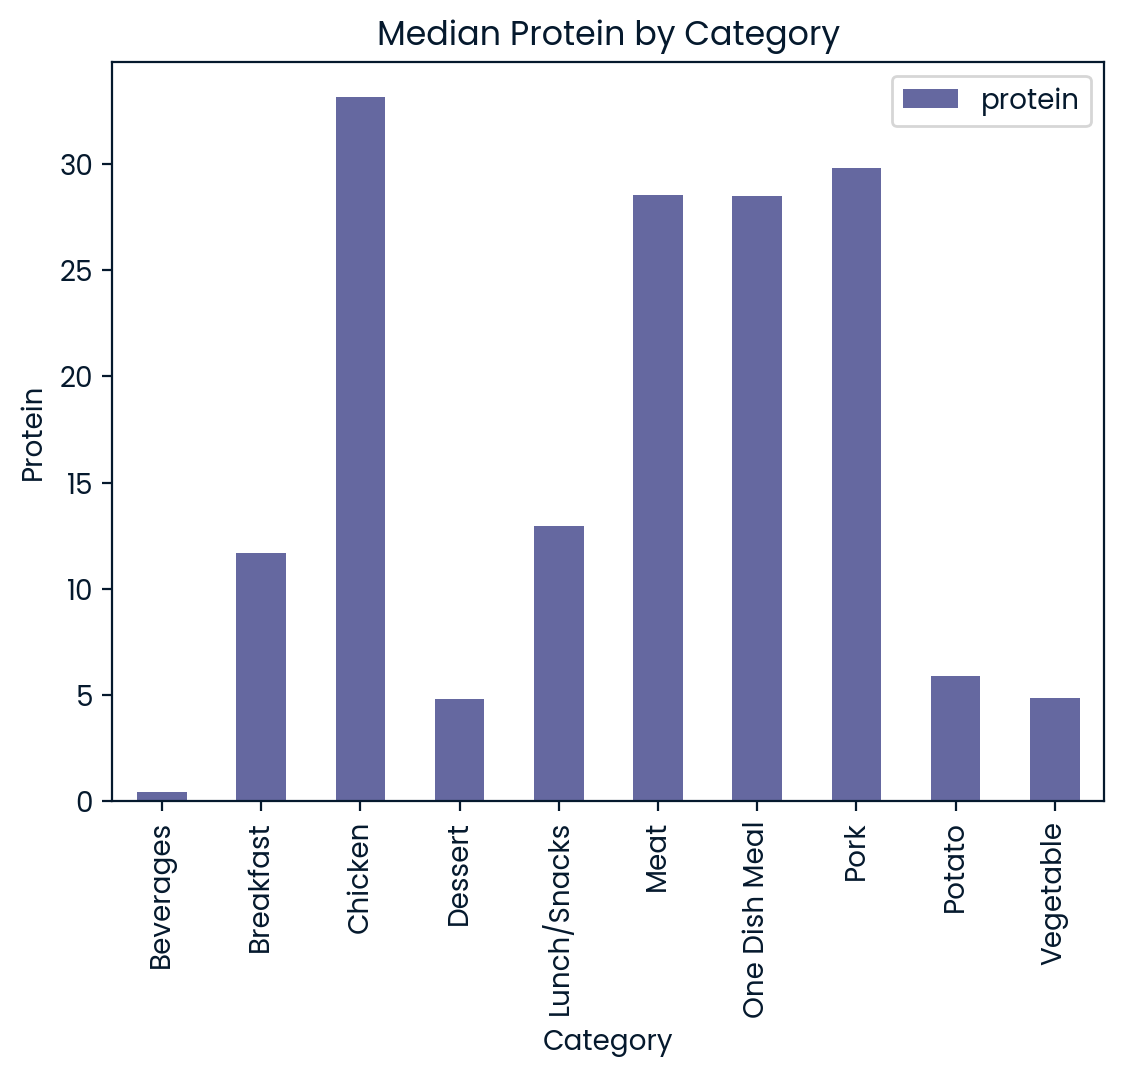

In [111]:
#group by category column and find total number of servings
category_medians = recipe_site_traffic.groupby("category")[numerical_columns].median().reset_index()
print(category_medians)

for column in numerical_columns:
    #create a bar plot
    plt.figure()
    category_medians.plot(x="category", y=column, kind="bar")
    
    #set x and y axis labels
    plt.xlabel("Category")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by Category")

#rotate x axis ticks
plt.xticks(rotation=90)
plt.show()

We find that, contrary to expectations, the medians for calories and nutritional components are not symmetrical and instead vary based on the kind of food and drink.

 Let's start by looking at the connection between servings and high traffic status.

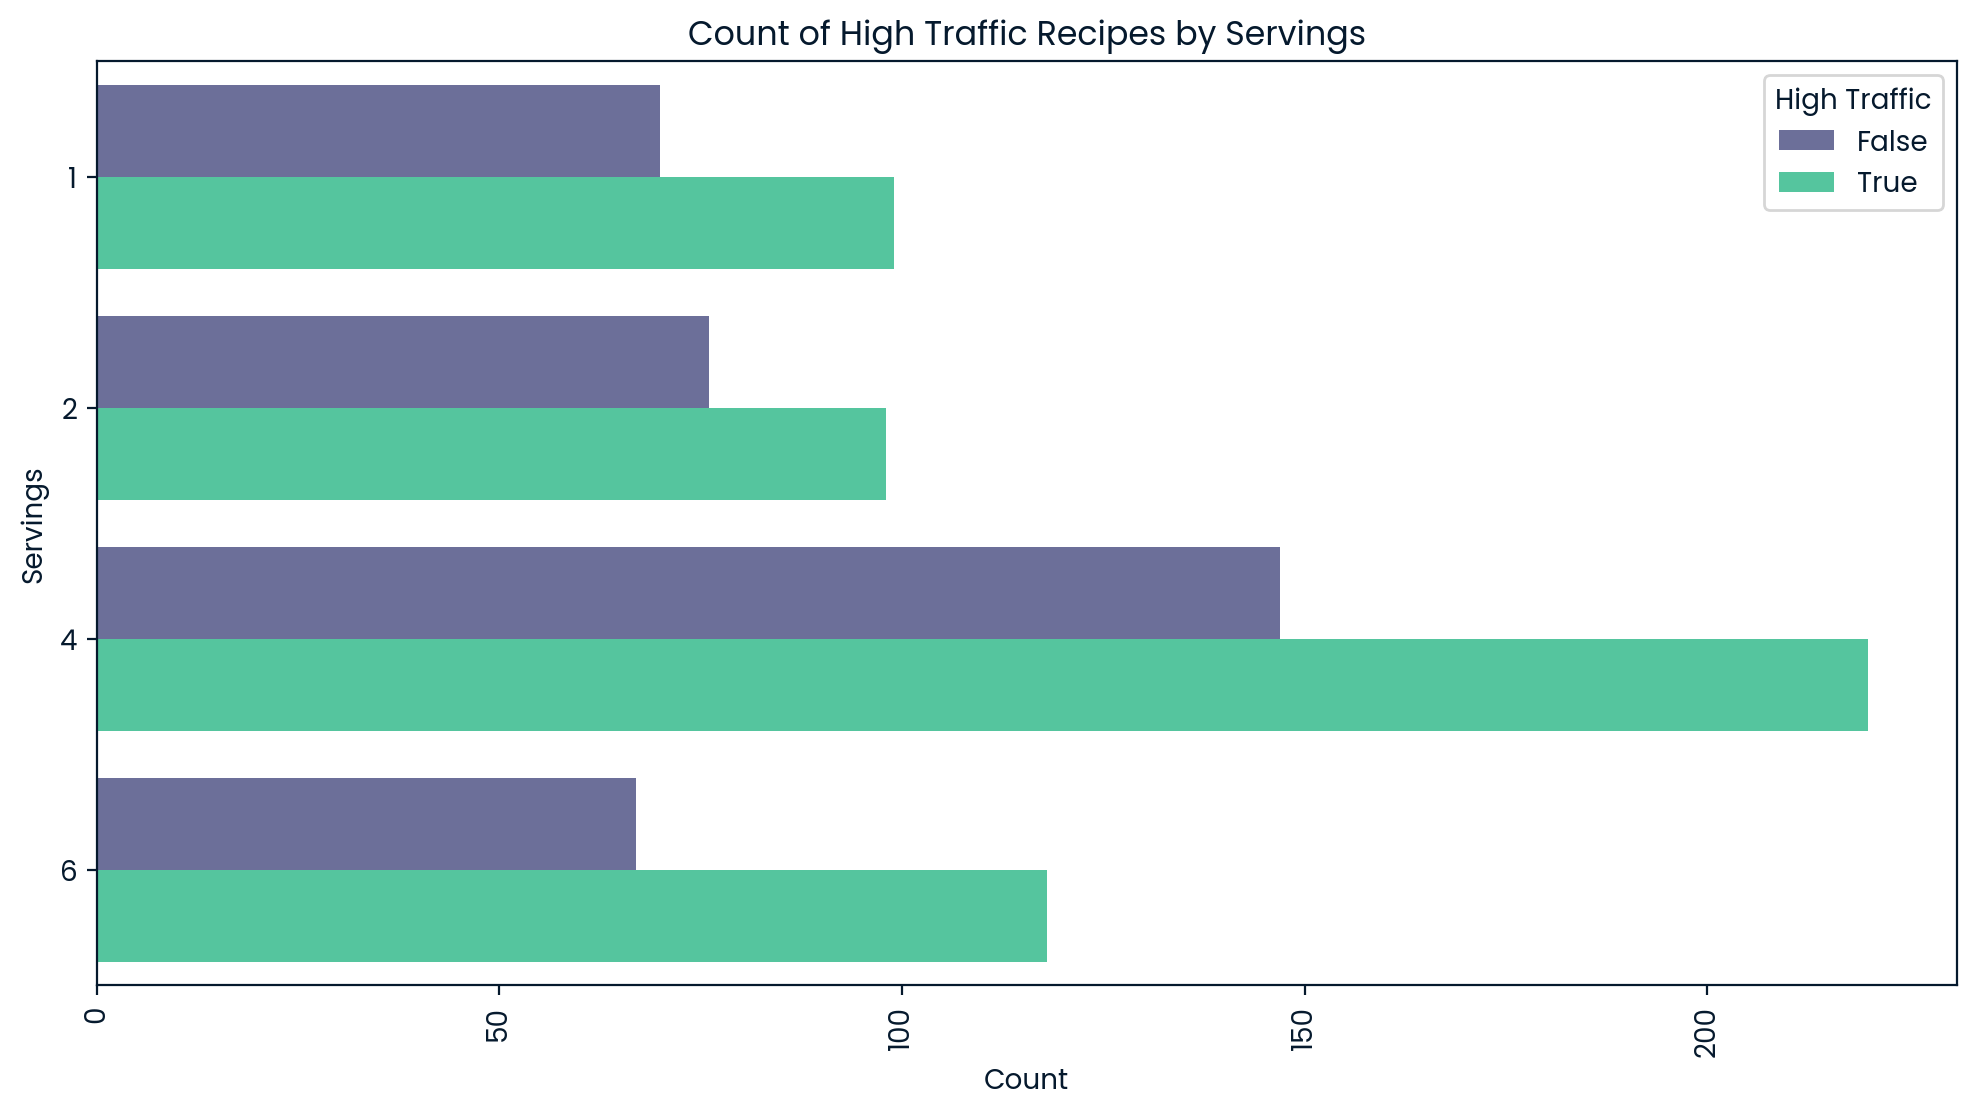

In [112]:
#create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y="servings", hue="high_traffic", data=recipe_site_traffic)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Servings")

#set title
plt.title("Count of High Traffic Recipes by Servings")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [113]:
#group by high_trafic to show how total number of survings is distributed
high_traffic_servings = pd.pivot_table(recipe_site_traffic, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic     False     True 
servings                        
1             0.414201  0.585799
2             0.436782  0.563218
4             0.400545  0.599455
6             0.362162  0.637838


Recipes with six servings have a higher rate of high traffic, as shown by the plot and the normalized numbers.

 We'll then look at the connection between high traffic status and categories.

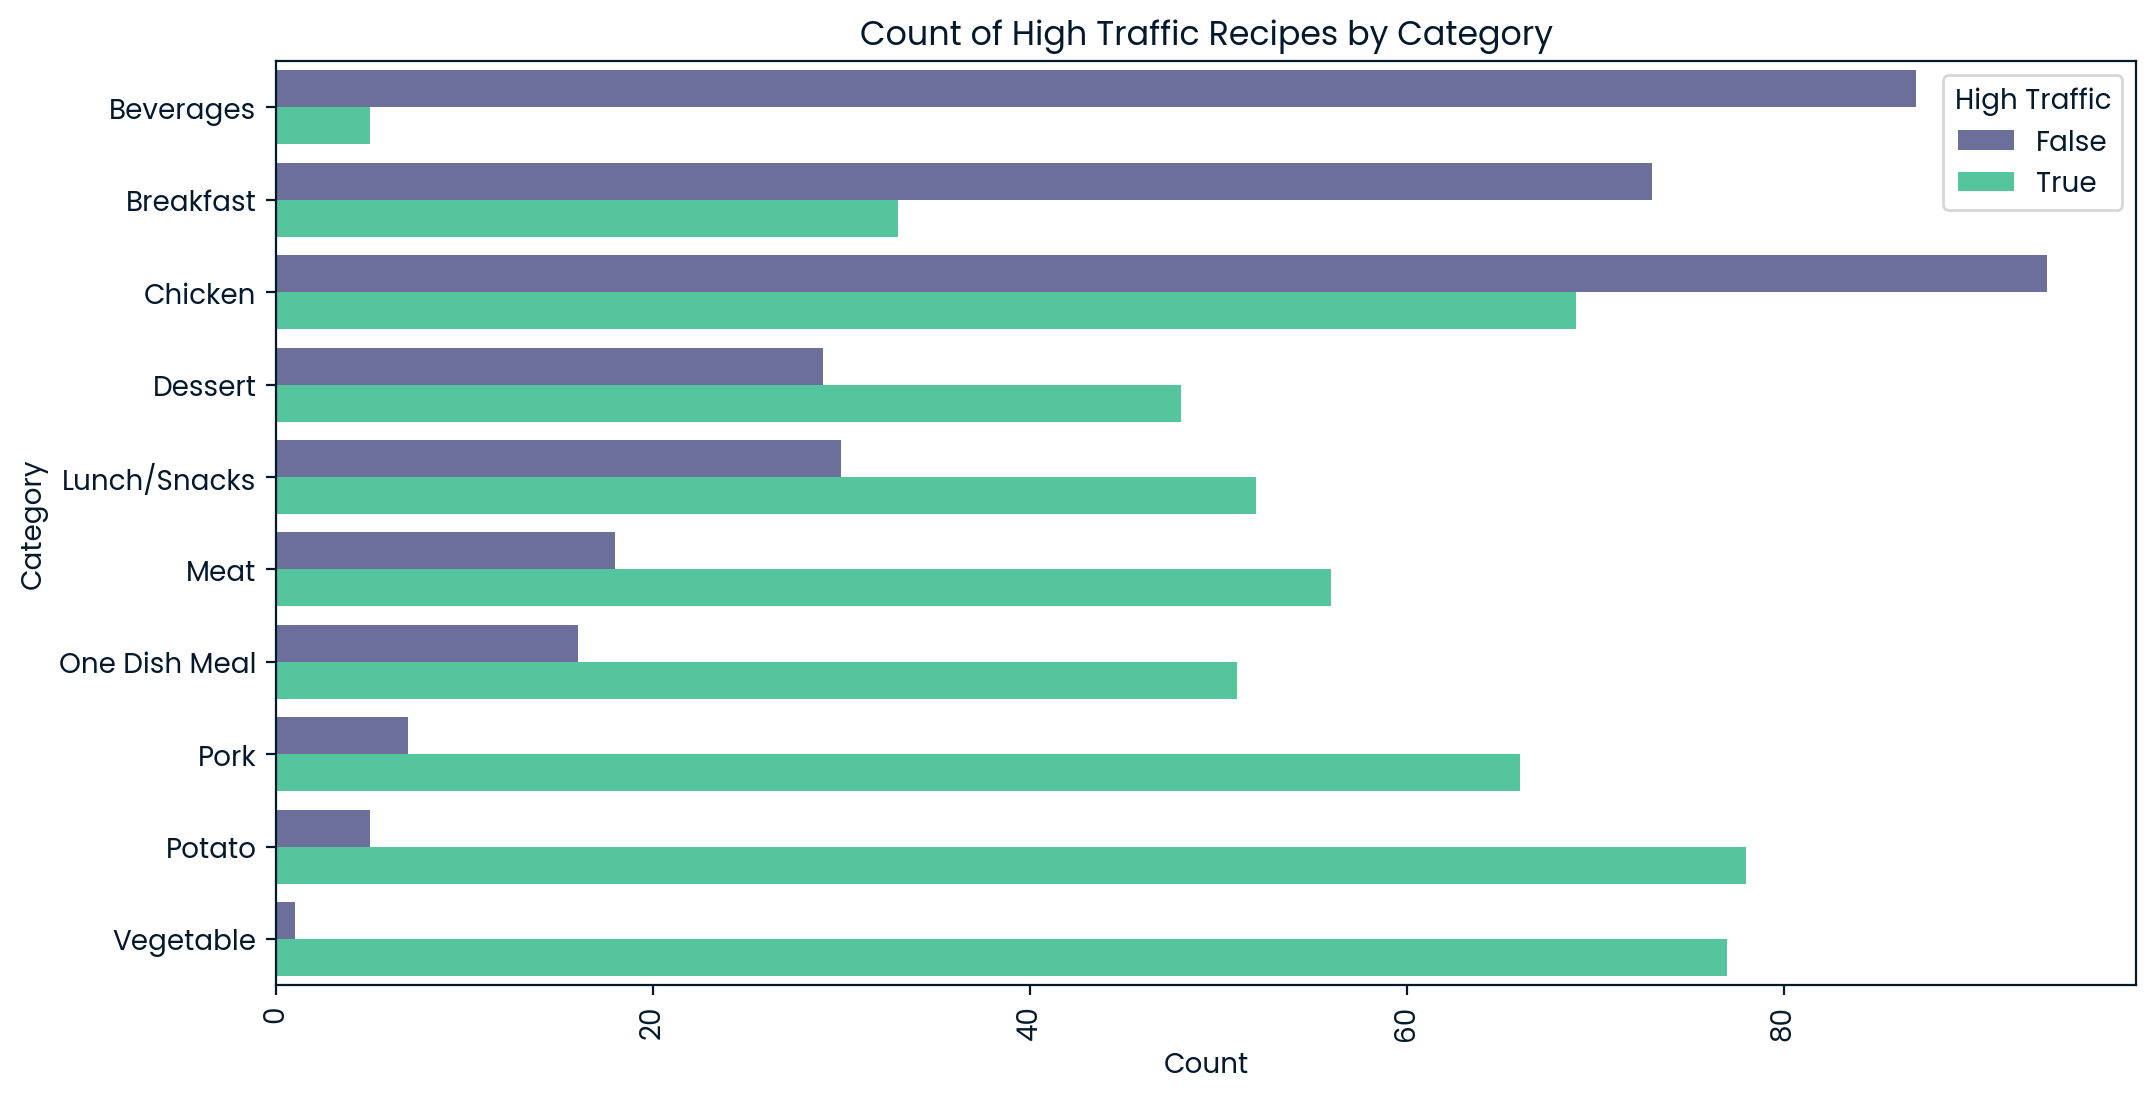

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(y="category", hue="high_traffic", data=recipe_site_traffic)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Category")

#set title
plt.title("Count of High Traffic Recipes by Category")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [115]:
#create pivot table for aggregation
high_traffic_category = recipe_site_traffic.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

#show the result
print(normalized_table)

high_traffic      False     True 
category                         
Beverages      0.939873  0.060127
Breakfast      0.685294  0.314706
Chicken        0.581056  0.418944
Dessert        0.372263  0.627737
Lunch/Snacks   0.385965  0.614035
Meat           0.270270  0.729730
One Dish Meal  0.198068  0.801932
Pork           0.087452  0.912548
Potato         0.041139  0.958861
Vegetable      0.013986  0.986014


As a result, we can conclude that displaying recipes in particular categories increases traffic.
 When it comes to high traffic, the top three categories are "Vegetable," "Potato," and "Pork."  The "Beverages" category, however, seems to have the least effect on traffic.
 Binary classification algorithms from the field of supervised machine learning are used to solve this issue.
 To forecast the high traffic situation, we might choose a suitable categorization model. 
 Support Vector Machines, Random Forest, Decision Trees, and Logistic Regression are all viable options. 
 We will choose to use Logistic Regression as our baseline model and compare the other models.

 Let's address the problem of outliers in our dataset before moving on to logistic regression. 
 To achieve this, we'll compute the Interquartile Range (IQR) for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.

In [116]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #calculate IQR
    iqr = q3 - q1
    
    #calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

In [117]:
#select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_site_traffic[column])
    outlier_limits[column] = (lower_limit, upper_limit)

#check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48
--------------------------------
Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001
--------------------------------
Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003
--------------------------------
Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001
--------------------------------


As expected, there are no issues with low values; nevertheless, some large values need to be addressed.
 There are several ways to deal with this problem.  After analysis, it becomes clear that eliminating outliers completely results in a large loss of data, which makes this strategy less desirable.
 Similarly, the intended distribution is not obtained by employing winsorization or capping outliers.

 The Yeo-Johnson Transformation is the most successful strategy, according to research using a variety of transformation techniques, including the Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation.

 Take note that some of the columns have zero values.  A very small value (such as 0.00001) might be used to replace these 0 values before applying the Box-Cox Transformation, however doing so could induce bias.  Consequently, the Yeo-Johnson approach has been favored.

In [118]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = recipe_site_traffic.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    transformed_data[column] = yeojohnson(transformed_data[column])[0]                      # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.742713,4.409023,0.481476,0.653469,Potato,4,True
1,3,17.437755,4.550612,1.224094,1.360783,Breakfast,1,False
2,4,8.416476,4.091120,2.587147,0.019804,Beverages,4,True
3,5,5.133412,1.101661,0.553884,0.425754,Beverages,4,False
4,6,16.024490,1.607528,0.883720,4.049462,One Dish Meal,2,True


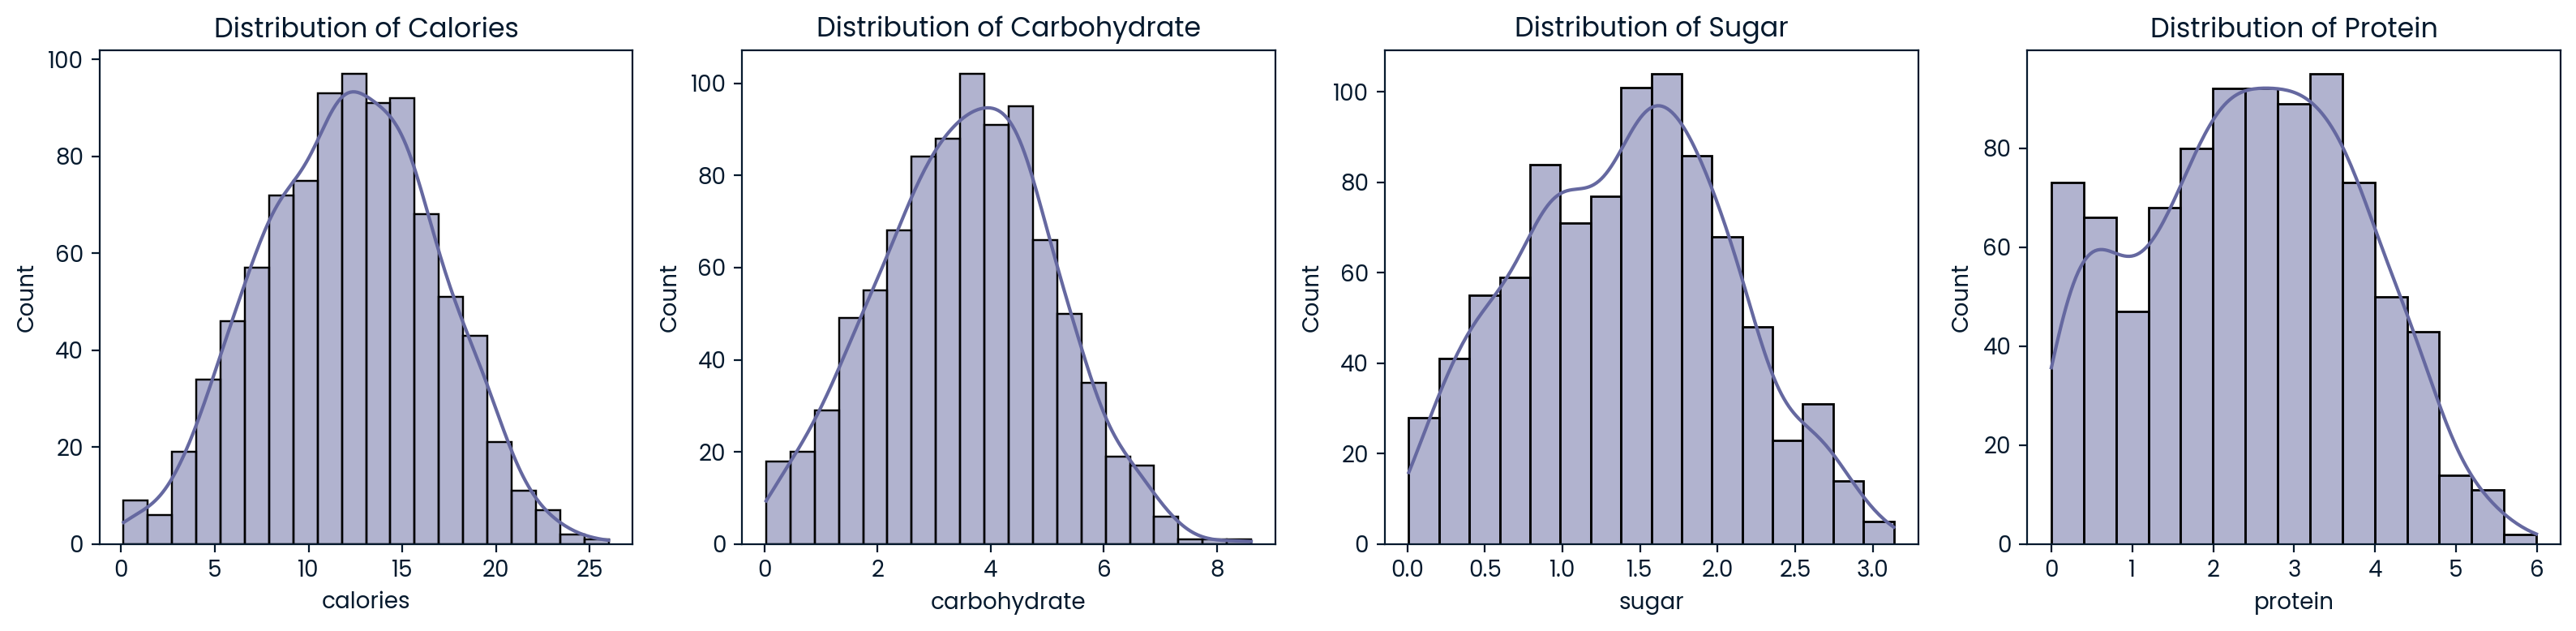

In [119]:
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

In [120]:
#performing one-hot encoding on the category column
encoded_categories = pd.get_dummies(recipe_site_traffic["category"])

#concatenate the encoded categories with the original dataframe
recipe_site_traffic_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
recipe_site_traffic_encoded = recipe_site_traffic_encoded.drop("category", axis=1)
recipe_site_traffic_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0


Divide the data into the goal variable (y) and features (X), with the "high_traffic" column serving as the target variable.
 Use the train_test_split function from the scikit-learn library to further separate the data into training and testing sets.
 Create the comparative model as well as the baseline model.
 Utilize the selected model to forecast the results on the testing data after fitting it to the training data.  To evaluate the possibility of overfitting, we may also use the predict approach to the trained model.
 Let's move forward with developing the baseline and comparative machine learning models while keeping this in mind.

In [121]:
#split the data into features (X) and target variable (y)
X = recipe_site_traffic_encoded.drop("high_traffic", axis=1)
y = recipe_site_traffic_encoded["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaulation_metrics = {}

    #fit the model
    model.fit(X_train, y_train)

    #predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    #find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)

    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

In [122]:
#logistic regression
logreg = LogisticRegression()
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

In [123]:
#decision tree
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = develop_model(dtree, X_train, y_train, X_test, y_test)

#random forest
rf = RandomForestClassifier()
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

#support vector machines
svm = SVC()
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

In [124]:
def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

In [125]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
  Accuracy: 0.7653631284916201
  Precision: 0.8009478672985783
  Recall: 0.8009478672985783
  F1-Score: 0.8009478672985783
  Confusion Matrix:
[[210  84]
 [ 84 338]]
Logistic Regression Test:
  Accuracy: 0.7653631284916201
  Precision: 0.808695652173913
  Recall: 0.8230088495575221
  F1-Score: 0.8157894736842104
  Confusion Matrix:
[[44 22]
 [20 93]]


Test and train outcomes differ slightly, according to the Logistic Regression model's evaluation.  Test results are slightly higher than train results, which suggests that there is not enough data to build a model.  Furthermore, no signs of overfitting are present.

 It is crucial to look at the precision metrics, which stand at 80.34%, since the goal is to anticipate high traffic recipes with an accuracy of 80%.  The objective of accurately forecasting high traffic recipes 80% of the time is in line with this precision score.

In [126]:
#print the evaluation metrics and confusion matrices for Decision Tree
print("Decision Tree Train:")
print_metrics(dtree_evaluation_metrics['train'])

print("Decision Tree Test:")
print_metrics(dtree_evaluation_metrics['test'])

Decision Tree Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Decision Tree Test:
  Accuracy: 0.659217877094972
  Precision: 0.75
  Recall: 0.6902654867256637
  F1-Score: 0.71889400921659
  Confusion Matrix:
[[40 26]
 [35 78]]


Because of the small amount of observations in the dataset, the Decision Tree model, which is generally resilient, has shown an example of overfitting.  The model has effectively memorized the training data, as evidenced by its overfitting, making it inappropriate for our particular dataset.

 It's crucial to remember that overfitting may be addressed using a variety of methods, including as regularization, cross-validation, and increasing training data.  These methods might not, however, produce the intended result given the paucity of data.

 Given these factors, the Decision Tree model's propensity for overfitting may make it less suitable for our dataset.

In [127]:
#print the evaluation metrics and confusion matrices for Random Fores
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Random Forest Test:
  Accuracy: 0.7653631284916201
  Precision: 0.8034188034188035
  Recall: 0.831858407079646
  F1-Score: 0.817391304347826
  Confusion Matrix:
[[43 23]
 [19 94]]


The Random Forest model is a robust algorithm that displays overfitting tendencies, much like the Decision Tree model.  This is in line with the justification for the Decision Tree model that was previously given.  The Random Forest model is unsuitable for application because to overfitting, even though the precision score exceeds the target of 80%.

 In this instance, the overfitting problem prevents us from making effective use of the Random Forest model, even though the precision score is in line with our objective.

In [128]:
# Print the evaluation metrics and confusion matrices for Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics['test'])

Support Vector Machines Train:
  Accuracy: 0.5893854748603352
  Precision: 0.5893854748603352
  Recall: 1.0
  F1-Score: 0.741652021089631
  Confusion Matrix:
[[  0 294]
 [  0 422]]
Support Vector Machines Test:
  Accuracy: 0.6312849162011173
  Precision: 0.6312849162011173
  Recall: 1.0
  F1-Score: 0.773972602739726
  Confusion Matrix:
[[  0  66]
 [  0 113]]


There is underfitting in the SVM model.  This results from the incapacity to learn efficiently from the small amount of training data that is available.  When the recall value is 1, it means that the model consistently predicts 0 in every situation.

 By dividing True Positives—high recipes that are accurately categorized as high—by False Positives—low recipes that are incorrectly classed as high—within the confusion matrix, we can create a KPI.  Based on the train and test results of our baseline, this KPI, which we might call the "High Traffic Conversion Rate," must be kept at a level equal to or higher than 4.0.  This can be a useful indicator for our company plan, giving us information about how accurate our forecasts of increased traffic are.

In [129]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [130]:
#KPI calculation for Logistic Regression
calculate_kpi(logreg_evaluation_metrics, "Logistic Regresssion")
print('\n')
#KPI calculation for Decision Tree
calculate_kpi(dtree_evaluation_metrics, "Decision Tree")

print('\n')
#KPI calculation for Random Forest
calculate_kpi(rf_evaluation_metrics, "Random Forest")

print('\n')
#KPI calculation for Support Vector Machines
calculate_kpi(svm_evaluation_metrics, "Support Vector Machines")


High Traffic Conversion Rate for Logistic Regresssion train:  4.023809523809524
High Traffic Conversion Rate for Logistic Regresssion test:  4.2272727272727275


High Traffic Conversion Rate for Decision Tree train:  inf
High Traffic Conversion Rate for Decision Tree test:  3.0


High Traffic Conversion Rate for Random Forest train:  inf
High Traffic Conversion Rate for Random Forest test:  4.086956521739131


High Traffic Conversion Rate for Support Vector Machines train:  1.435374149659864
High Traffic Conversion Rate for Support Vector Machines test:  1.7121212121212122


Overfitting causes the "KPI = inf" to appear in the Decision Tree and Random Forest models' training results.  Additionally, these models' test results don't fulfill our predefined KPI criterion.

 Underfitting plays a part in the SVM model's failure to meet our KPI criteria in both training and testing results.

 In the end, both the training and testing outcomes in our baseline Logistic Regression model effectively meet our KPI criteria.

SUMMARY

In conclusion, in order to achieve our goal, we developed and tested several models.  Out of all the models developed, the logistic regression model proved to be the most successful.  This demonstrates that the logistic regression model is the best option for forecasting recipes with high traffic and obtaining an accuracy rate of 80%.

 From a business standpoint, it is more significant to anticipate a recipe with high traffic as low traffic than the converse.  Because an incorrect prediction of low traffic for a recipe that could have large traffic can result in significant losses for the company, our main focus is on model precision.

 In addition, we unveiled a custom KPI called "High Traffic Conversion Rate."  Its value came from the results of our baseline model.  After that, we used this KPI to make it easier to compare the created models.

 We discovered some recipe categories that regularly generate high or low traffic through exploratory analysis.  It is advised that recipes classified as "Vegetable," "Potato," or "Pork" be added to the website because they typically receive a lot of traffic.  On the other hand, recipes classified as "Beverages" usually receive little traffic, indicating that they shouldn't be highlighted on the website.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation